<a href="https://colab.research.google.com/github/ssanchezgoe/eafit_isa/blob/main/Nb_Google_Colab/S02_Bases_Estadisticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  <tr>
     <th><p><img alt="Colaboratory logo" height="80px" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/83/Sena_Colombia_logo.svg/1045px-Sena_Colombia_logo.svg.png" align="left" hspace="10px" vspace="0px"></p></th> 
    <th><p><img alt="Colaboratory logo" height="80px" src="https://www.isa.co/wp-content/uploads/2020/11/logo.png" align="right" hspace="10px" vspace="0px"></p></th>
    <th><p><img alt="Colaboratory logo" height="80px" src="https://upload.wikimedia.org/wikipedia/commons/b/bf/EAFIT-2015.png" align="left" hspace="10px" vspace="0px"></p></th> 
     <th><h1>  Bases de Estadística Básica Aplicada </h1></th>
  </tr>








# Medidas de tendencia central

Un conjunto de datos, ya sean cualitativos o cuantitativos, contiene todo tipo de información interesante según se analice. Por ejemplo podemos tener información sobre un número determinado de clientes y con esta información determinar patrones o características para mejorar y optimizar nuestros esfuerzos en ventas y programas de fidelidad.   


Analizar una gran cantidad de datos para determinar modelos, inferir información o predecir comportamientos en una actividad que se ejecuta en todas las áreas de la ciencia y que se menciona cuando se llega a hacer divulgación. Sin embargo, se presenta un problema al hablar del conjunto de datos en donde son muchas **muestras** para distintas **características**. En el caso de los clientes, podemos tener información de la edad, de las compras usuales y otros datos personales o comerciales para un número de 20, 30, 1000 personas. A esto se conoce como dimensión de los datos.

<p><img alt="A" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/f/fb/Darts_in_a_dartboard.jpg" align="left" hspace="10px" vspace="0px"></p>

Es común al tener una gran cantidad de datos cuyos puntos intentar englobar en un fórmula o modelo, pero muchas veces queremos tener una información rápida y de baja dimensión, es decir un número solamente, que nos permita obtener una idea del comportamiento de mis datos en diferentes sentidos y me permita resumir información interesante para comprender mejor mis datos y hacer comparaciones entre ellos. A estas medidas se les conoce como **medidas de tendencia central**.  



## Los datos y las variables

Se entiende por variable a una cantidad que tiende a tomar distintos valores en un determinado conjunto, ya sea numérico o de otro tipo. Básicamente es la forma en cómo organizamos y llamamos a nuestros datos, por ejemplo:


In [ ]:
#@title {display-mode: "form"}
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from itertools import accumulate
from datetime import datetime, timedelta
plt.rcParams.update({'font.size': 16})
np.random.seed(19680801)

In [ ]:
#@title Variables de muchos tipos {display-mode: "form"}

def random_date_generator(start_date, range_in_days,N=1):
    days_to_add = np.arange(0, range_in_days,1)
    random_date = [np.datetime64(start_date) + np.random.choice(days_to_add) for i in range(N)]
    return random_date

datos = pd.DataFrame({'Cliente_id':['id001_rg'+str(i) for i in range(10)],
              'Edad':np.random.randint(16,75,10),
              'Tipo':np.random.choice(['Frecuente','Ocasional','Promedio','Potencial'],10),
              'Ingreso': random_date_generator('2015-01-01',365*5,N=10)
              })
datos

,Cliente_id,Edad,Tipo,Ingreso
0,id001_rg0,36,Frecuente,2017-12-08
1,id001_rg1,60,Promedio,2019-05-15
2,id001_rg2,36,Promedio,2017-04-21
3,id001_rg3,61,Potencial,2016-09-19
4,id001_rg4,22,Frecuente,2018-04-17
5,id001_rg5,50,Ocasional,2018-08-06
6,id001_rg6,50,Potencial,2015-04-07
7,id001_rg7,39,Potencial,2019-05-12
8,id001_rg8,19,Promedio,2015-04-06
9,id001_rg9,65,Ocasional,2019-07-23


## La media aritmética 

La media aritmética de un conjunto de datos numéricos se obtiene sumando los datos y dividiendo entre el número total de datos.

$${\displaystyle {\bar {x}}={\frac {1}{n}}\sum _{i=1}^{n}x_{i}={\frac {x_{1}+x_{2}+\cdots +x_{n}}{n}}}$$

In [ ]:
#@title Hallar la media aritmética de 5 números

number_1 = 6.0 #@param {type:"number"}
number_2 = 5.0 #@param {type:"number"}
number_3 = 3.0 #@param {type:"number"}
number_4 = 1.0 #@param {type:"number"}
number_5 = 6.0 #@param {type:"number"}

number = [number_1,number_2,number_3,number_4,number_5]
sum_number = ''.join([str(n)+' + ' for n in number])[:-2]
print("La suma es igual a ",sum_number,' = ',sum(number))
print("La media es igual a ",sum(number),'/ 5 =',sum(number)/5)


La suma es igual a  6.0 + 5.0 + 3.0 + 1.0 + 6.0   =  21.0
La media es igual a  21.0 / 5 = 4.2


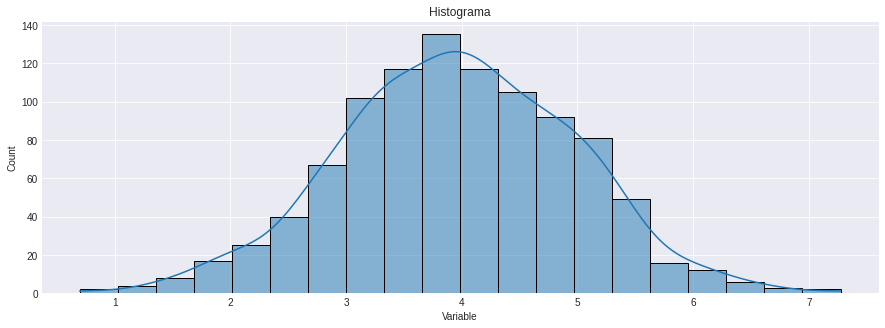

In [ ]:
#@title Distribución
Centro_Distribucion =  4#@param {type:"integer"}


import seaborn as sns
def hist_sea(y):
    plt.figure(figsize=(15,5))
    ax = plt.subplot(1,1,1)
    ax.set_title('Histograma')
    #sns.distplot(y,bins=20, hist_kws={"rwidth":0.75},hist = True,ax=ax)
    sns.histplot(y,bins=20,kde=True,ax=ax)
    ax.set_xlabel('Variable')
    return ax

plt.style.use('seaborn-darkgrid')
y = np.random.normal(Centro_Distribucion,1,1000)
ax = hist_sea(y)
plt.show() 

### Ventajas

* Fácil cálculo.
* Es única para cada conjunto de datos.
* Se interpreta como un punto de equilibrio o centro de masas. 
* Es útil para llevar a cabo procedimientos estadísticos como la comparación de medias de varios conjuntos de datos.
* Toma en cuenta todos y cada uno de los elementos de los datos.


### Desventajas

* Es una medida a cuyo significado depende la dispersión, de modo que cuanto menos homogéneos sean los datos, menos información proporciona.
* En el análisis real de la media no todos los valores contribuyen de la misma manera. Los valores altos tienen más peso que los valores cercanos a cero.

## La media ponderada

En muchos casos no todos los valores tiene la misma importancia y puede ser útil otorgar pesos o valores a los datos dependiendo de su relevancia para determinado estudio. En ese caso no se suman los valores uno a uno sino se halla una **suma ponderada**, al dividir por la suma de los pesos tenemos la media ponderada

$${\bar  {x}}={\frac  {\sum _{{i=1}}^{n}x_{i}w_{i}}{\sum _{{i=1}}^{n}w_{i}}}={\frac  {x_{1}w_{1}+x_{2}w_{2}+x_{3}w_{3}+...+x_{n}w_{n}}{w_{1}+w_{2}+w_{3}+...+w_{n}}}$$

### Pesos normalizados 

Para cada peso podríamos tener su peso normalizado como:
$${\displaystyle w'_{i}={\frac {w_{i}}{\sum _{k=1}^{n}w_{k}}}}$$

En ese caso se asegura que la suma de esos pesos sea:
$${\displaystyle \sum _{i=1}^{n}{w_{i}'}=1}$$

Y la media ponderada se calcula:
$${\displaystyle {\bar {x}}=\sum _{i=1}^{n}{w_{i}'x_{i}}}$$

In [ ]:
#@title Hallar la media ponderada de 3 números

number_1 =  4#@param {type:"number"}
w_1 = 24 #@param {type:"slider", min:0, max:100, step:1}
number_2 = 5.0 #@param {type:"number"}
w_2 = 25 #@param {type:"slider", min:0, max:100, step:1}
number_3 = 1.0 #@param {type:"number"}
w_3 =  25#@param {type:"slider", min:0, max:100, step:1}

number = [number_1,number_2,number_3]
w = [w_1,w_2,w_3]
w_norm =  np.array(w)/sum(w)
print('Los pesos normalizados son:',w_norm)
sum_pond = sum(np.array(number)*w_norm)
sum_number = ''.join(['%.2f*%.2f + '%(number[i],w_norm[i]) for i in range(3)])[:-2]
print("La media ponderada es igual a ",sum_number,' = ',round(sum_pond,2))


Los pesos normalizados son: [0.32432432 0.33783784 0.33783784]
La media ponderada es igual a  4.00*0.32 + 5.00*0.34 + 1.00*0.34   =  3.32


## Media geométrica

En la media aritmética se suman los valores de la variables lo cual nos indica que hay un carácter aditivo, por ejemplo cuando se suman las diferentes edades para obtener una edad promedio. 

Sin embargo, hay variables que presentan variaciones acumulativas, por lo que ni la suma ni la media tienen un sentido real, por ejemplo, una rebaja del 50% sobre otra rebaja del 50% no hacen en total una rebaja del 100%, lo que alude a un caráter multiplicativo. 

$${\displaystyle {\bar {x}}={\sqrt[{n}]{\prod _{i=1}^{n}{x_{i}}}}={\sqrt[{n}]{x_{1}\cdot x_{2}\cdots x_{n}}}}$$

También tiene una versión ponderada:
$${\displaystyle {\bar {x}}=\left({\prod _{i=1}^{n}{x_{i}}^{\alpha _{i}}}\right)^{\frac {1}{\sum _{i}{\alpha _{i}}}}=\left({x_{1}}^{\alpha _{1}}{x_{2}}^{\alpha _{2}}\dots {x_{n}}^{\alpha _{n}}\right)^{\frac {1}{\alpha _{1}+\dots +\alpha _{n}}}}$$

Donde $\alpha_i$ son los pesos

In [ ]:
#@title Hallar la media geométrica del crecimiento de una población en 3 años

pob_init = 10000 #@param {type:"integer"}
porcentaje_1 =  5#@param {type:"number"}
porcentaje_2 = 20 #@param {type:"number"}
porcentaje_3 =  50#@param {type:"number"}
porcentaje = [porcentaje_1,porcentaje_2,porcentaje_3]
media_a = sum([t/100 + 1 for t in porcentaje])/3 
media_geo = np.prod([t/100 + 1 for t in porcentaje])**(1/3) 
pob_acc = [pob_init]
pob_acc_1 = [pob_init]
pob_acc_2 = [pob_init]
for t in porcentaje:
  pob_acc.append(pob_acc[-1]*(1+t/100))
  pob_acc_1.append(pob_acc_1[-1]*(media_a))
  pob_acc_2.append(pob_acc_2[-1]*(media_geo))
pob = pd.DataFrame({'Pob Inicial':pob_acc[:-1],
                    'Pob Final':pob_acc[1:],
                    'Factor Crec':[t/100 + 1 for t in porcentaje],
                    'Factor Crec (M.A.)':media_a,
                    'Pob final (M.A.)':pob_acc_1[1:],
                    'Factor Crec (M.G.)':media_geo,
                    'Pob final (M.G.)':pob_acc_2[1:]},
                   index=['Año %i'%i for i in range(1,4)])

pob

,Pob Inicial,Pob Final,Factor Crec,Factor Crec (M.A.),Pob final (M.A.),Factor Crec (M.G.),Pob final (M.G.)
Año 1,10000.0,10500.0,1.05,1.25,12500.00,1.236386,12363.855899
Año 2,10500.0,12600.0,1.20,1.25,15625.00,1.236386,15286.493270
Año 3,12600.0,18900.0,1.50,1.25,19531.25,1.236386,18900.000000


In [ ]:
#@title Calculo de la población, paso a paso.
factors = [t/100 + 1 for t in porcentaje]
print(f"Media aritmética: 1/3*({factors[0]}+{factors[1]}+{factors[2]})={np.mean(factors)}")

print(f"Media geométrica: ({factors[0]}*{factors[1]}*{factors[2]})^(1/3)={(factors[0]*factors[1]*factors[2])**(1/3)}")

print(f"Cálculo de la población: {pob_init}*{factors[0]}*{factors[1]}*{factors[2]} = {pob_init*factors[0]*factors[1]*factors[2]}")
print(f"Cálculo de la población con la media geométrica: {pob_init}*{media_geo}*{media_geo}*{media_geo} = {pob_init*media_geo*media_geo*media_geo}")

Media aritmética: 1/3*(1.05+1.2+1.5)=1.25
Media geométrica: (1.05*1.2*1.5)^(1/3)=1.236385589942567
Cálculo de la población: 10000*1.05*1.2*1.5 = 18900.0
Cálculo de la población con la media geométrica: 10000*1.236385589942567*1.236385589942567*1.236385589942567 = 18900.000000000004


### Ventajas
* Es menos sensible que la media aritmética a los valores extremos.
* Utiliza todos los datos.


### Desventajas
* Es de significado estadístico menos intuitivo que la media aritmética.
* Su cálculo es más difícil.
* Si un valor $x_i=0$ entonces la media geométrica se igual a cero.



## Mediana

La mediana es un punto que divide la muestra ordenada (de menor a mayor)
en dos grupos iguales (50% - 50%). Es un punto que está justo en mitad de la
muestra, y no tiene por qué coincidir con la media.



### Mediana para datos no agrupados

Supongamos que tenemos el grupo de datos no agrupados $x_{1},x_{2},x_{3},\ldots ,x_{n}$, los cuales están organizados de mayor a menor y $n$ es impar. La mediana sería:

$$M_{e}=x_{{(n+1)/2}}$$


Si $n$ es par, la mediana sería:
$$M_{e}=(x_{{{\frac  {n}{2}}}}+x_{{{{\frac  {n}{2}}}+1}})/2$$


Imágenes sacadas de [portal](https://www.portaleducativo.net/octavo-basico/790/Media-moda-mediana-rango)



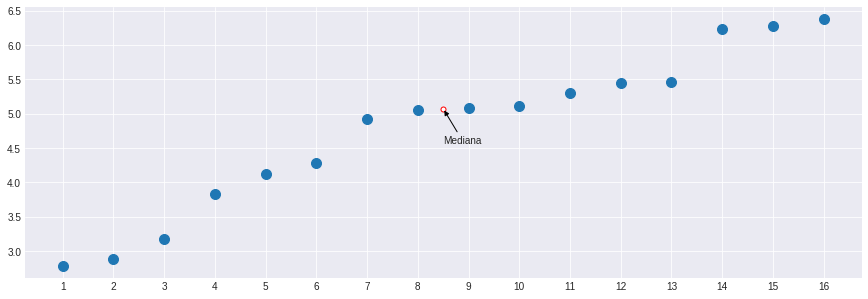

El conjunto de datos (organizados) es: [2.782 2.887 3.171 3.823 4.127 4.288 4.928 5.056 5.089 5.109 5.308 5.441
 5.462 6.228 6.279 6.381]
La mediana es: 5.073


In [ ]:
#@title Hallar la mediana de un conjunto de números no agrupados
import matplotlib.ticker as ticker
cantidad = 16 #@param {type:"slider", min:1, max:50, step:1}
min_number =  2#@param {type:"number"}
max_number =  8#@param {type:"number"}
datos = np.random.uniform(min_number,max_number,size=cantidad)
datos.sort()
pmedio = 0.5*(cantidad//2) + 0.5*(cantidad//2+1)if cantidad%2==0 else cantidad//2 +1
median = 0.5*datos[cantidad//2-1] + 0.5*datos[cantidad//2]if cantidad%2==0 else datos[cantidad//2]
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(range(1,cantidad+1),datos,'o ',ms=10)
ax.plot(pmedio,median,'or',markerfacecolor='w',ms=5)
ax.annotate('Mediana', xy=(pmedio, median), xytext=(pmedio, 0.9*median),
            arrowprops=dict(arrowstyle="-|>", connectionstyle="arc3",facecolor='black'))
ax.xaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0))
plt.show()

with np.printoptions(precision=3, suppress=True):
  print('El conjunto de datos (organizados) es:',datos)
  print('La mediana es: %.3f'%median)

### Mediana para datos agrupados 

Los datos agrupados son aquellos que se presentan en una tabla de frecuencias. En este caso hay dos formas de calcular la mediana de forma aproximada:

* La más evidente, crear unos datos no agrupados organizando los valores y agregando datos según el número de veces que determine su frecuencia, luego hallar la mediana con el método anterior.

* O, suponer que los individuos están repartidos uniformemente en cada valor e interpolar utilizando triángulos semejantes.

El segundo método es más fácil de entender con un ejemplo:

In [ ]:
#@title Hallar la mediana de un conjunto de números agrupados

cantidad = np.random.randint(1,10)
min_freq = 2 #@param {type:"slider", min:1, max:20, step:1}
max_freq = 13 #@param {type:"slider", min:1, max:20, step:1}
min_number =  9#@param {type:"number"}
max_number = 20 #@param {type:"number"}

datos = np.random.uniform(min_number,max_number,size=cantidad)
freq = np.random.randint(min_freq,max_freq,size=cantidad)
datos = pd.DataFrame({'Dato':datos,'Frecuencia':freq})
datos = datos.sort_values(by='Dato')
datos['Frec Acum']=list(accumulate(datos['Frecuencia']))
datos


,Dato,Frecuencia,Frec Acum
2,10.048715,5,5
0,11.581263,3,8
3,13.015409,5,13
1,15.328626,5,18


In [ ]:
#@title Mediana de un conjunto de números agrupados
total = datos['Frec Acum'].iloc[-1]
pmedio = 0.5*(total//2) + 0.5*(total//2+1)if total%2==0 else total//2 +1
if total%2!=0:
  median=datos[datos['Frec Acum'] >= pmedio]['Dato'].iloc[0]
  print("La mediana es la variable que ocupe el puesto", pmedio,'cuyo valor es:%f'%median)
else:
  median1=datos[datos['Frec Acum'] > pmedio]['Dato'].iloc[0]
  median2=datos[datos['Frec Acum'] > pmedio]['Dato'].iloc[1]
  median=median1*0.5+median2*0.5
  print("La mediana es el promedio entre los puestos [%d,%d]"%(pmedio//1,pmedio//1 +1),'cuyo valor es:%f'%median)
i1 = datos[datos['Frec Acum'] < pmedio].index[-1]
i2 = np.concatenate([np.array([i1]),datos[datos['Frec Acum'] >= pmedio].index.values[0:2]])
datos.loc[i2]


La mediana es el promedio entre los puestos [9,10] cuyo valor es:14.172018


,Dato,Frecuencia,Frec Acum
0,11.581263,3,8
3,13.015409,5,13
1,15.328626,5,18


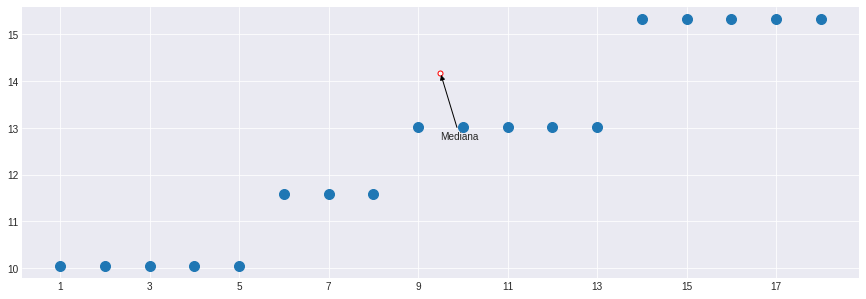

In [ ]:
#@title Gráfica mediana de datos agrupados
fig,ax = plt.subplots(figsize=(15,5))
datos_flatt = datos['Dato'].repeat(datos['Frecuencia'].values).values
ax.plot(range(1,total+1),datos_flatt,'o ',ms=10)
ax.plot(pmedio,median,'or',markerfacecolor='w',ms=5)
ax.annotate('Mediana', xy=(pmedio, median), xytext=(pmedio, 0.9*median),
            arrowprops=dict(arrowstyle="-|>", connectionstyle="arc3",facecolor='black'))
ax.xaxis.set_major_locator(ticker.IndexLocator(base=2, offset=0))
plt.show()

## Moda

La moda representa el valor (o valores) más frecuentes del conjunto de datos.





### Ventajas
* Cálculo sencillo.
* Interpretación muy clara.
* Al depender sólo de las frecuencias, puede calcularse para variables cualitativas. 



### Desventajas
* Su valor es independiente de la mayor parte de los datos, lo que la hace muy sensible a variaciones muestrales.

* Usa muy pocas observaciones, de tal modo que grandes variaciones en los datos fuera de la moda, no afectan en modo alguno a su valor.

* Puede haber más de una moda.

## Interpetación de las medidas de tendencia central

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


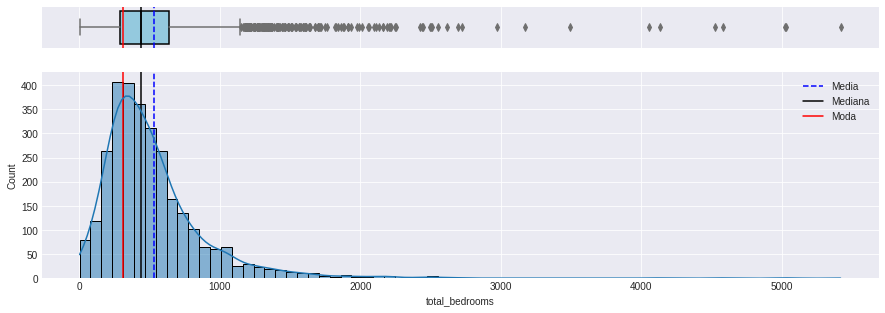

In [ ]:
#@title Medidas de tendecia central

data = pd.read_csv('sample_data/california_housing_test.csv')
def central_measures(data):
  f, ax = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.2, 1)},figsize=(15,5))
  [axi.axvline(data.mean(),color='b',ls='--',label='Media') for axi in ax]
  [axi.axvline(data.median(),color='k',label='Mediana') for axi in ax]
  [axi.axvline(data.mode().iloc[-1],color='r',label='Moda') for axi in ax]
  sns.boxplot(data, ax=ax[0],color='skyblue',medianprops={'color':'black'})
  [a.set_edgecolor('black')for a in ax[0].artists]
  ax[0].set(xlabel='')
  sns.histplot(data,bins=70, kde=True,ax=ax[1])

  ax[1].legend()
  plt.show()

columna = 'total_bedrooms' #@param ['longitude', 'latitude', 'housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income','median_house_value']
central_measures(data[columna])

# Medidas de dispersión

Las medidas de tendencia central no son suficientes para describir un conjuntos de datos, ya que estos se distribuyen entre los valores máximo y mínimo de distintas formas. Así que se considera vital saber la forma en cómo se concentran los datos alrededor de un valor central o posición, estás medidas se conocen cómo  **medidas de dispersión**

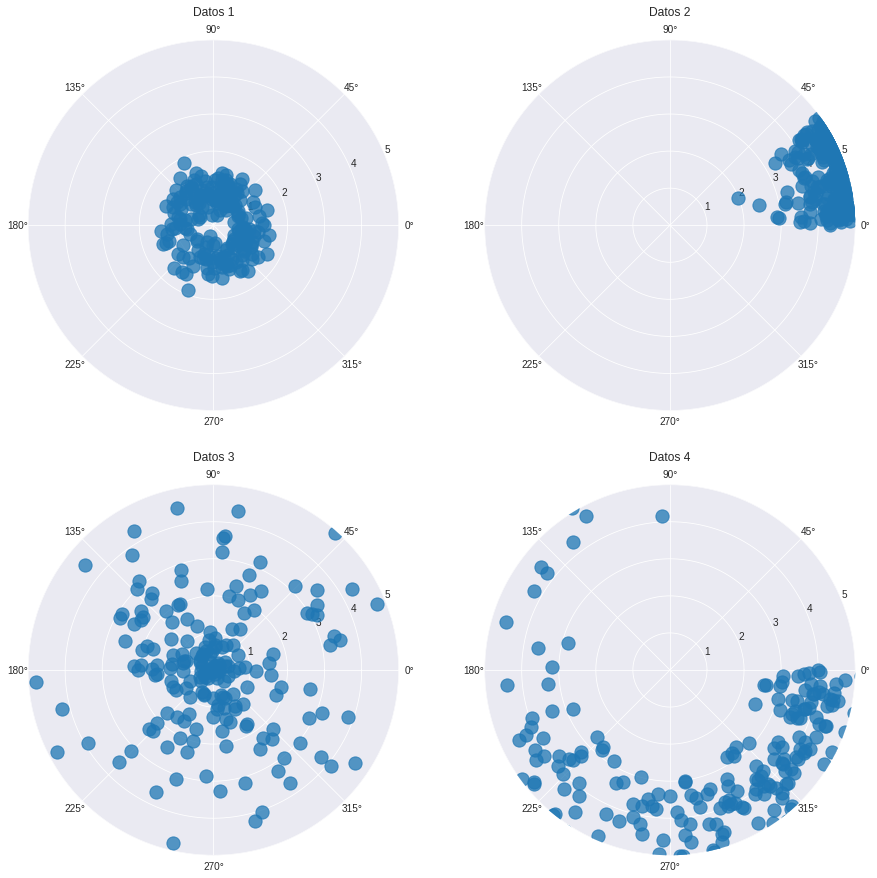

In [ ]:
#@title Entendiendo la dispersión de datos
fig = plt.figure(figsize=(15,15))
N = 200

r = [np.abs(np.random.normal(1,0.3,N)),
     np.abs(5-np.random.exponential(0.5,N)),
     np.abs(np.random.normal(1,2,N)),
     np.abs(np.random.normal(4,0.7,N))]
theta = [2 * np.pi * np.random.uniform(0,1,N), 
         2 * np.pi * np.random.uniform(0,0.1,N),
         2 * np.pi * np.random.uniform(0,1,N),
         2 * np.pi * np.random.beta(4,1,N)]
area = 50 * r[0].max()**2
for i in range(4):
  ax = fig.add_subplot(2,2,i+1, projection='polar')
  ax.set_title('Datos %d'%(i+1))
  c = ax.scatter(theta[i], r[i], s=area, cmap='hsv', alpha=0.75)
  ax.set_rlim(0, 5)


## Medidas de Rangos

### Rango
El Rango es el intervalo entre el valor máximo y el valor mínimo, cuanto mayor es el rango, más dispersos están los datos. 

### Rango medio 
El Rango es la media del menor y mayor valor de un conjunto de datos, o la mitad del camino entre el dato de menor valor y el dato de mayor.

### Rango intercuartílico

Rango intercuartílico o rango intercuartil, a la diferencia entre el tercer y el primer cuartil de una distribución (pos 25%, pos 75%).

* Primer cuartil (Q1) como la mediana de la primera mitad del conjunto de datos
* Segundo cuartil (Q2) como la propia mediana del conjunto de datos
* Tercer cuartil (Q3) como la mediana de la segunda mitad del conjunto de datos

In [ ]:
#@title Rangos
data = pd.DataFrame({'vmax':[ri.max() for ri in r],
                     'vmin':[ri.min() for ri in r],
                     'rango':[ri.max()-ri.min() for ri in r],
                     'rango medio':[0.5*ri.max()+0.5*ri.min() for ri in r],
                     'IRC':[np.percentile(ri,75)-np.percentile(ri,25) for ri in r],
                     },index=['Datos #%d'%(i+1) for i in range(4)])
data

,vmax,vmin,rango,rango medio,IRC
Datos #1,1.872361,0.281062,1.591299,1.076712,0.438261
Datos #2,4.998106,1.968330,3.029777,3.483218,0.627861
Datos #3,7.293941,0.007011,7.286931,3.650476,2.116934
Datos #4,5.771964,2.460860,3.311104,4.116412,0.856125


## Medidas de Desviación

Las medidas de desviación son medidas que comparan los valores del conjunto de datos con la media de los datos. 

### Varianza
La varianza es una medida de dispersión, que es la media de los cuadrados de las distancias entre los puntos y el valor medio de todo el conjunto.

$${\displaystyle \sigma _{n}^{2}={\frac {1}{n}}\sum _{i=1}^{n}\left(x_{i}-{\overline {X}}\right)^{2}=\left({\frac {1}{n}}\sum _{i=1}^{n}x_{i}^{2}\right)-{\overline {X}}^{2}={\frac {1}{n^{2}}}\sum _{i=1}^{n}\sum _{j>i}\left(x_{i}-x_{j}\right)^{2}}$$

###Desviación estándar

Es conocida como la raíz cuadrada de la variancia:

$${\displaystyle \sigma ={\sqrt {{\frac {1}{n}}\sum _{i=1}^{n}(x_{i}-\mu )^{2}}}}$$

## Sesgo de la variancia 

Podemos entender el sesgo estadístico con los datos #1 y #2. Ambos datos se concentran alrededor de un punto pero si tomamos el centro de la gráfica como el punto de equilibrio (o el valor real al que deseamos llegar), es claro que los datos #2 tiene un sesgo o un desplazamiento en sus valores.

En estadística podemos establecer la presencia de este sesgo por medio de una comparación entre la media poblacional (esperanza), algo netamente probabilístico, con su valor numérico. Si lanzamos un dado equilibrado cada cara tiene la misma probabilidad de salir y ese valor esperado es igual a su media aritmética (3.5).  

En cambio la varianza si es sesgada, es decir su esperanza depende del tamaño de la muestra en un factor de $\dfrac{n-1}{n}$, para muestras grandes esto no es importante pero para muestras más pequeñas se suele hacer una corrección de sesgo: 

$${\displaystyle \hat\sigma _{n}^{2}={\frac {n}{n-1}}\sum _{i=1}^{n}\left(x_{i}-{\overline {X}}\right)^{2}}$$

Y para la desviación
$${\displaystyle \hat\sigma ={\sqrt {{\frac {1}{n-1}}\sum _{i=1}^{n}(x_{i}-\mu )^{2}}}}$$

### Desviación media

La desviación promedio absoluta es la media de los valores absolutos de las distancias entre cada valor en el conjunto de datos y la media.

$$ D_m = \frac{1}{n} \sum_{i=1}^n
 \left| x_i - \overline{x} \right|$$

 ### Desviación mediana

La desviación mediana absoluta es la mediana de los valores absolutos de las distancias entre cada valor en el conjunto de datos y la media.

 $$ D_{me} = MD(
 {\left| x_i - \overline{x} \right|}_{i=1,...,n})$$

### Coeficiente de variación de pearson

Medida de dispersión adimensional, que se expresa tanto de forma decimal como en tanto por ciento, y nos expresaría la desviación típica como porcentaje con respecto a la media.

 $$ CV = \dfrac{\sigma}{\bar x}$$



In [ ]:
#@title Rangos y desviaciones
data['var'] = [ri.var() for ri in r]
data['std'] = [ri.std() for ri in r]
data['avgd'] = [sum(np.abs(ri -ri.mean()))/N for ri in r]
data['me_d'] = [np.percentile(np.abs(ri -ri.mean()),50) for ri in r]
data['cv'] = [ri.std()/ri.mean() for ri in r]
data

,vmax,vmin,rango,rango medio,IRC,var,std,avgd,me_d,cv
Datos #1,1.872361,0.281062,1.591299,1.076712,0.438261,0.092351,0.303892,0.252185,0.221920,0.302700
Datos #2,4.998106,1.968330,3.029777,3.483218,0.627861,0.255487,0.505457,0.383956,0.324613,0.112717
Datos #3,7.293941,0.007011,7.286931,3.650476,2.116934,1.886994,1.373679,1.130584,1.092506,0.737411
Datos #4,5.771964,2.460860,3.311104,4.116412,0.856125,0.484514,0.696071,0.552310,0.413747,0.170689


## Figuras comparativas

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

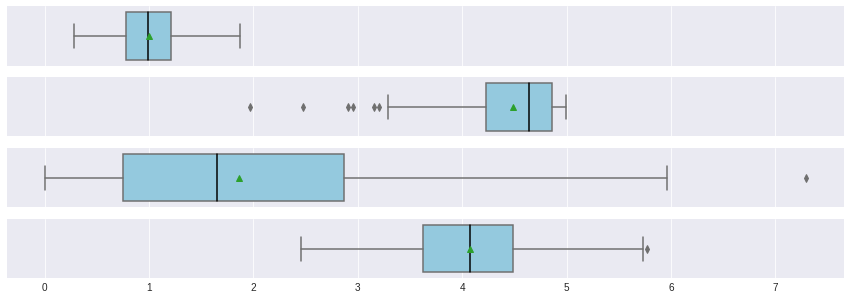

In [ ]:
#@title Figuras de caja y bigotes
f, ax = plt.subplots(4, sharex=True, figsize=(15,5))
for i in range(4):
  sns.boxplot(r[i], ax=ax[i],color='skyblue',medianprops={'color':'black'},showmeans=True)

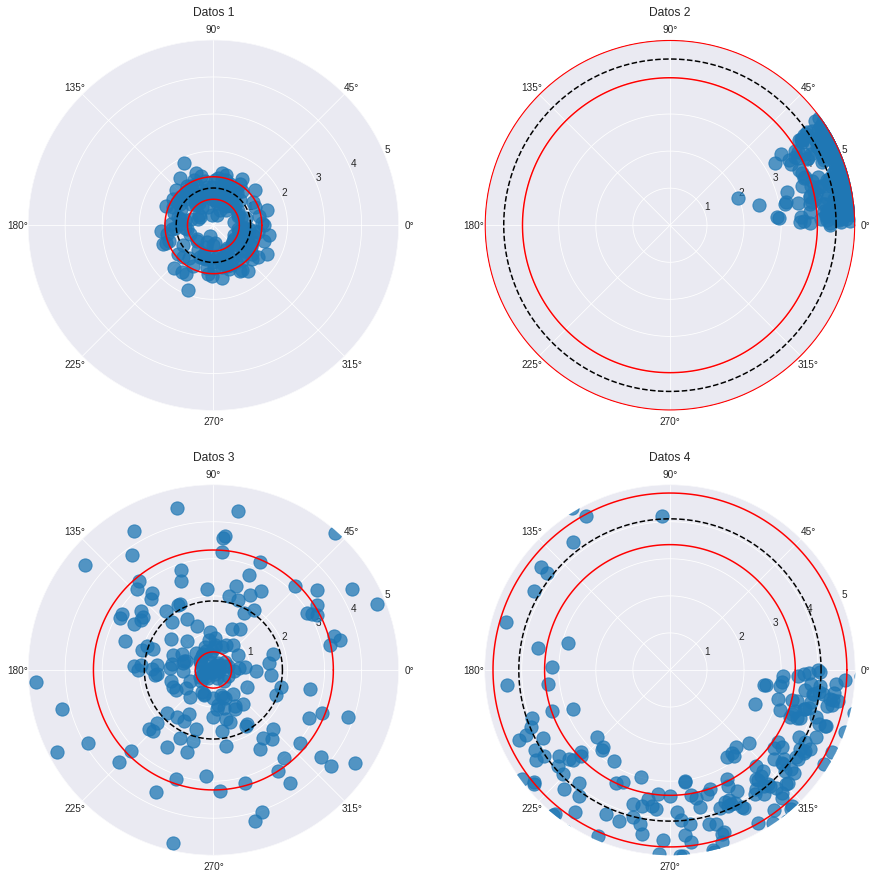

In [ ]:
#@title La media y las desviación estándar 
fig = plt.figure(figsize=(15,15))
for i in range(4):
  ax = fig.add_subplot(2,2,i+1, projection='polar')
  ax.set_title('Datos %d'%(i+1))
  c = ax.scatter(theta[i], r[i], s=area, cmap='hsv', alpha=0.75)
  c = ax.plot(np.linspace(0,2*np.pi,N), np.repeat(r[i].mean() + r[i].std(),N),color='r')
  c = ax.plot(np.linspace(0,2*np.pi,N), np.repeat(r[i].mean() - r[i].std(),N),color='r')
  c = ax.plot(np.linspace(0,2*np.pi,N), np.repeat(r[i].mean() ,N),'k--')
  ax.set_rlim(0, 5)

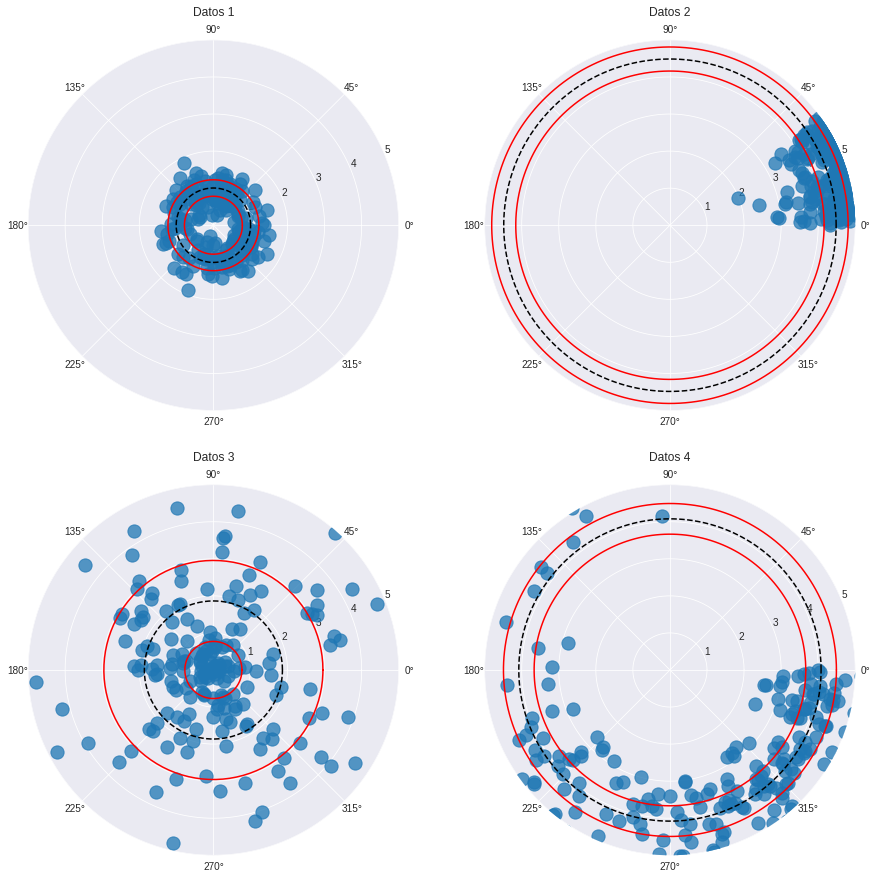

In [ ]:
#@title La media y las desviación media 
fig = plt.figure(figsize=(15,15))
for i in range(4):
  ax = fig.add_subplot(2,2,i+1, projection='polar')
  ax.set_title('Datos %d'%(i+1))
  c = ax.scatter(theta[i], r[i], s=area, cmap='hsv', alpha=0.75)
  c = ax.plot(np.linspace(0,2*np.pi,N), np.repeat(r[i].mean() + data['me_d'].iloc[i],N),color='r')
  c = ax.plot(np.linspace(0,2*np.pi,N), np.repeat(r[i].mean() - data['me_d'].iloc[i],N),color='r')
  c = ax.plot(np.linspace(0,2*np.pi,N), np.repeat(r[i].mean() ,N),'k--')
  ax.set_rlim(0, 5)